# Visualizzasione delle parole del lessico ELIta con metodi distribuzionali
In questo notebook, eseguiamo un'analisi delle parole del lessico ELIta utilizzando tecniche di riduzione della dimensionalità come PCA, t-SNE e TruncatedSVD. L'obiettivo è visualizzare la distribuzione delle emozioni associate alle parole ed emoji presenti nel dataset.
Seguiremo gli stessi passaggi del notebook di analisi delle emoji, adattandoli alle parole del lessico ELIta.

## Separazione dei Dati (Emoji vs Parole)

In [ ]:
import pandas as pd
import emoji
import plotly.io as pio

pio.renderers.default = "notebook_connected"

pivotedData = pd.read_csv("ELIta_INTENSITY_Matrix.csv", index_col=0)

def is_likely_emoji(text):
    return emoji.emoji_count(str(text)) > 0

pivotedData['is_emoji'] = [is_likely_emoji(x) for x in pivotedData.index]

df_only_emojis = pivotedData[pivotedData['is_emoji'] == True].copy()
df_only_words = pivotedData[pivotedData['is_emoji'] == False].copy()

print(f"Totale elementi: {len(pivotedData)}")
print(f"Numero di Emoji trovate: {len(df_only_emojis)}")
print(f"Numero di Parole testuali: {len(df_only_words)}")

In [2]:
df_only_emojis.head()

,amore,aspettativa,attivazione,disgusto,dominanza,fiducia,gioia,neutrale,paura,rabbia,sorpresa,tristezza,valenza,is_emoji
parola,,,,,,,,,,,,,,
‼,0.35,0.17,6.67,0.04,5.17,0.00,0.71,0.0,0.17,0.67,0.83,0.12,5.00,True
⁉,0.11,0.21,7.67,0.04,5.50,0.04,0.17,0.0,0.29,0.17,0.71,0.08,4.33,True
☠,0.15,0.04,6.00,0.46,5.50,0.12,0.17,0.0,0.67,0.54,0.17,0.58,3.83,True
☹,0.02,0.12,5.83,0.08,3.50,0.04,0.00,0.0,0.21,0.17,0.04,1.00,2.67,True
☺,0.73,0.50,6.17,0.00,7.00,0.54,0.92,0.0,0.00,0.00,0.62,0.00,7.33,True


In [3]:
df_only_words.head()

,amore,aspettativa,attivazione,disgusto,dominanza,fiducia,gioia,neutrale,paura,rabbia,sorpresa,tristezza,valenza,is_emoji
parola,,,,,,,,,,,,,,
????,0.08,0.17,7.00,0.17,4.33,0.04,0.12,0.0,0.17,0.42,0.79,0.42,5.17,False
a_caso,0.04,0.21,5.00,0.08,3.00,0.04,0.04,0.0,0.54,0.29,0.83,0.21,4.33,False
a_malincuore,0.00,0.12,5.50,0.21,3.67,0.00,0.00,0.0,0.21,0.21,0.04,0.83,3.33,False
a_scanso_di,0.21,0.58,5.33,0.04,4.67,0.25,0.17,0.0,0.17,0.42,0.21,0.25,5.00,False
abbagliante,0.32,0.62,7.00,0.00,6.50,0.17,0.46,0.0,0.12,0.12,0.71,0.04,6.67,False


## Visualizzazione delle Emoji (PCA)


In [4]:
import pandas as pd
from Visualizzazione.emotion_config import EMOTION_COLORS, BASIC_EMOTIONS, ALL_EMOTIONS, VAD_FEATURES
from Visualizzazione.pca_utils import perform_pca_analysis, perform_tsne_analysis, perform_svd_analysis
from Visualizzazione.visualizer import plot_pca_single, plot_pca_3d

# Calcolo emozioni dominanti per le PAROLE (non emoji)
dominant_basic_words = df_only_words[BASIC_EMOTIONS].fillna(0).idxmax(axis=1)
dominant_all_words = df_only_words[ALL_EMOTIONS].fillna(0).idxmax(axis=1)

### Visualizzazione PCA per le 8 Emozioni di Base
Il seguente codice esegue la PCA sulle emoji basandosi solo sulle 8 emozioni di base e crea un grafico con due visualizzazioni affiancate: una con le emoji come testo e l'altra con marker colorati.


In [5]:
pca_basic = perform_pca_analysis(df_only_words, BASIC_EMOTIONS, dominant_basic_words)

fig1 = plot_pca_single(
    pca_data=pca_basic,
    colors_dict={k: v for k, v in EMOTION_COLORS.items() if k in BASIC_EMOTIONS},
    title="PCA Parole: Distribuzione 8 Emozioni Base"
)
fig1.show()

---


### Visualizzazione PCA per le 10 Emozioni (8 di base + 2 extra)

In [6]:
pca_all = perform_pca_analysis(df_only_words, ALL_EMOTIONS, dominant_all_words)

fig2 = plot_pca_single(
    pca_data=pca_all,
    colors_dict=EMOTION_COLORS,
    title="PCA Parole: Spazio a 10 Emozioni (+ Amore e Neutrale)"
)
fig2.show()

---

### Visualizzazione PCA per le 3 Dimensioni VAD, senza standirdizzazione
Senza standardizzazione, per vedere l'effetto delle scale originali (1-9).

In [7]:
pca_vad = perform_pca_analysis(df_only_words, VAD_FEATURES, dominant_all_words, scale=False)

fig3 = plot_pca_single(
    pca_data=pca_vad,
    colors_dict=EMOTION_COLORS,
    title="PCA Parole: VAD (Scale Originali)",
    plot_loadings=True,
    feature_names=VAD_FEATURES
)
fig3.show()

---


### Visualizzazione PCA per le 3 Dimensioni VAD, con standirdizzazione
Con standardizzazione, per portare le scale 1-9 su una scala comparabile (z-score).

In [8]:
pca_vad_scaled = perform_pca_analysis(df_only_words, VAD_FEATURES, dominant_all_words, scale=True)

fig4 = plot_pca_single(
    pca_data=pca_vad_scaled,
    colors_dict=EMOTION_COLORS,
    title="PCA Parole: VAD Standardizzata (Z-Score)",
    plot_loadings=True,
    feature_names=VAD_FEATURES
)
fig4.show()

---

### Visualizzazione PCA VAD 3D

In [9]:
pca_vad_3d = perform_pca_analysis(
    df=df_only_words, 
    features_columns=VAD_FEATURES, 
    dominant_emotions=dominant_all_words, 
    scale=True,        
    n_components=3     
)

fig_3d = plot_pca_3d(
    pca_data=pca_vad_3d,
    colors_dict=EMOTION_COLORS,
    title="Spazio Emotivo 3D Parole (VAD)"
)

fig_3d.show()

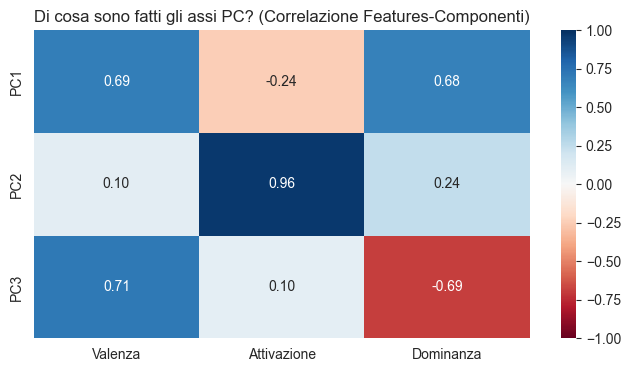

      Valenza  Attivazione  Dominanza
PC1  0.693808    -0.244679   0.677320
PC2  0.101650     0.964370   0.244249
PC3  0.712950     0.100612  -0.693959


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

pca_obj = pca_vad_3d['pca_object']
components = pca_obj.components_

loadings_df = pd.DataFrame(
    components,
    columns=['Valenza', 'Attivazione', 'Dominanza'],
    index=['PC1', 'PC2', 'PC3']
)

plt.figure(figsize=(8, 4))
sns.heatmap(loadings_df, annot=True, cmap='RdBu', center=0, fmt='.2f', vmin=-1, vmax=1)
plt.title("Di cosa sono fatti gli assi PC? (Correlazione Features-Componenti)")
plt.show()

print(loadings_df)

### Visualizzazione PCA per tutte le 13 Feature

In [11]:
hybrid_features = ALL_EMOTIONS + VAD_FEATURES

pca_hybrid = perform_pca_analysis(
    df=df_only_words, 
    features_columns=hybrid_features, 
    dominant_emotions=dominant_all_words, 
    scale=True
)

fig5 = plot_pca_single(
    pca_data=pca_hybrid,
    colors_dict=EMOTION_COLORS,
    title="PCA Ibrida Parole: Emozioni + VAD (13 feature)",
    plot_loadings=True,
    feature_names=hybrid_features 
)
fig5.show()

#TODO: perchè è stato aggiunto neutrale?

## Visualizzazione delle Emoji (metodi diversi)

### t-SNE

In [12]:
# Per le parole, spesso serve una perplexity più alta (30-50) perché sono tante
tsne_data = perform_tsne_analysis(
    df=df_only_words, 
    features_columns=hybrid_features, 
    dominant_emotions=dominant_all_words, 
    perplexity=40, 
    scale=True
)

fig_tsne = plot_pca_single(
    pca_data=tsne_data,
    colors_dict=EMOTION_COLORS,
    title="t-SNE Parole: Clustering Non-Lineare (13 Feature)",
    plot_loadings=False
)
fig_tsne.show()

In [13]:
# Per le parole, spesso serve una perplexity più alta (30-50) perché sono tante
tsne_data = perform_tsne_analysis(
    df=df_only_words, 
    features_columns=ALL_EMOTIONS, 
    dominant_emotions=dominant_all_words, 
    perplexity=40, 
    scale=True
)

fig_tsne = plot_pca_single(
    pca_data=tsne_data,
    colors_dict=EMOTION_COLORS,
    title="t-SNE Parole: Clustering Non-Lineare (10 Feature)",
    plot_loadings=False
)
fig_tsne.show()

In [14]:
# Per le parole, spesso serve una perplexity più alta (30-50) perché sono tante
tsne_data = perform_tsne_analysis(
    df=df_only_words, 
    features_columns=VAD_FEATURES, 
    dominant_emotions=dominant_all_words, 
    perplexity=40, 
    scale=True
)

fig_tsne = plot_pca_single(
    pca_data=tsne_data,
    colors_dict=EMOTION_COLORS,
    title="t-SNE Parole: Clustering Non-Lineare (3 VAD)",
    plot_loadings=False
)
fig_tsne.show()

### TruncatedSVD

In [15]:
svd_data = perform_svd_analysis(
    df=df_only_words, 
    features_columns=hybrid_features, 
    dominant_emotions=dominant_all_words
)

fig_svd = plot_pca_single(
    pca_data=svd_data,
    colors_dict=EMOTION_COLORS,
    title="TruncatedSVD Parole: Intensità Emotiva (13 dimensioni)",
    plot_loadings=True,
    feature_names=hybrid_features
)
fig_svd.show()

In [16]:
svd_data = perform_svd_analysis(
    df=df_only_words, 
    features_columns=ALL_EMOTIONS,
    dominant_emotions=dominant_all_words
)

fig_svd = plot_pca_single(
    pca_data=svd_data,
    colors_dict=EMOTION_COLORS,
    title="TruncatedSVD Parole: Intensità Emotiva (13 dimensioni)",
    plot_loadings=True,
    feature_names=ALL_EMOTIONS
)
fig_svd.show()

In [17]:
svd_data = perform_svd_analysis(
    df=df_only_words, 
    features_columns=VAD_FEATURES, 
    dominant_emotions=dominant_all_words
)

fig_svd = plot_pca_single(
    pca_data=svd_data,
    colors_dict=EMOTION_COLORS,
    title="TruncatedSVD Parole: Intensità Emotiva (10 dimensioni)",
    plot_loadings=True,
    feature_names=VAD_FEATURES
)
fig_svd.show()